In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
reviews_data = pd.read_csv('/content/drive/MyDrive/MS/Sem 2/ALDA/Project/clustered_hotel_reviews.csv')
reviews_data.columns
reviews_data.head()

,Unnamed: 0,hotel,review,topic,topic2,is_topic_similar,sentiment,sentiment_analyser,compound_score,compound_score_sentiment,Classes
0,0,1,cute home absolut perfect wine tast weekend vi...,0,0,yes,"Sentiment(polarity=0.5604166666666668, subject...","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9705,Positive,1
1,1,1,amaz hous beauti view nice get away charlott p...,0,0,yes,"Sentiment(polarity=0.6, subjectivity=1.0)","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.4215,Positive,1
2,2,1,place awesom beauti stun view peac great time ...,0,1,no,"Sentiment(polarity=0.8, subjectivity=0.75)","{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'comp...",0.9246,Positive,2
3,3,1,place awesom coupl close wineri area peac view...,1,3,no,"Sentiment(polarity=0.0, subjectivity=0.1)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,1
4,4,1,onli wish book longer veri peac,0,4,no,"Sentiment(polarity=0.0, subjectivity=0.0)","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.4019,Positive,1


* Get aggregate polarity

In [6]:
grouped_df = reviews_data.groupby('hotel')['compound_score'].mean().reset_index()
grouped_df

,hotel,compound_score
0,1,0.732347
1,2,0.703233
2,4,0.658258
3,5,0.664740
4,6,0.703813
...,...,...
206,1023,0.753994
207,1053,0.682010
208,1111,0.725410
209,1138,0.664147


In [7]:
reviews_data['sentiment']

0        Sentiment(polarity=0.5604166666666668, subject...
1                Sentiment(polarity=0.6, subjectivity=1.0)
2               Sentiment(polarity=0.8, subjectivity=0.75)
3                Sentiment(polarity=0.0, subjectivity=0.1)
4                Sentiment(polarity=0.0, subjectivity=0.0)
                               ...                        
14727    Sentiment(polarity=0.36666666666666664, subjec...
14728    Sentiment(polarity=0.39999999999999997, subjec...
14729          Sentiment(polarity=0.35, subjectivity=0.65)
14730    Sentiment(polarity=0.175, subjectivity=0.34166...
14731    Sentiment(polarity=0.31666666666666665, subjec...
Name: sentiment, Length: 14732, dtype: object

In [8]:
final_data = pd.read_csv('/content/drive/MyDrive/MS/Sem 2/ALDA/Project/cleaned_dataset.csv')
final_data = final_data.rename(columns={'Unnamed: 0': 'hotel'})
final_data

,hotel,rooms,prices_list,stars_list,number_of_reviews_list,url,occupancy,beds,bath
0,1,1.0,189.0,5.00,48,https://www.airbnb.com/rooms/70155276546880672...,4,4,4
1,2,1.0,85.0,4.94,311,https://www.airbnb.com/rooms/47803025?adults=1...,2,2,2
2,3,1.0,159.0,5.00,6,https://www.airbnb.com/rooms/77525649707744941...,2,2,2
3,4,1.0,276.0,4.93,333,https://www.airbnb.com/rooms/43650708?adults=1...,2,2,2
4,5,1.0,98.0,4.94,36,https://www.airbnb.com/rooms/71210893757841335...,2,2,2
...,...,...,...,...,...,...,...,...,...
601,1139,1.0,100.0,4.90,84,https://www.airbnb.com/rooms/45687936,2,2,2
602,1140,1.0,131.0,4.82,267,https://www.airbnb.com/rooms/24916446,4,4,4
603,1141,2.0,129.0,4.96,112,https://www.airbnb.com/rooms/33558746,6,6,6
604,1143,1.0,82.0,4.88,328,https://www.airbnb.com/rooms/18914613,2,2,2


In [9]:
final_data = final_data.merge(grouped_df, on="hotel", how="outer")
final_data

,hotel,rooms,prices_list,stars_list,number_of_reviews_list,url,occupancy,beds,bath,compound_score
0,1,1.0,189.0,5.00,48,https://www.airbnb.com/rooms/70155276546880672...,4,4,4,0.732347
1,2,1.0,85.0,4.94,311,https://www.airbnb.com/rooms/47803025?adults=1...,2,2,2,0.703233
2,3,1.0,159.0,5.00,6,https://www.airbnb.com/rooms/77525649707744941...,2,2,2,NaN
3,4,1.0,276.0,4.93,333,https://www.airbnb.com/rooms/43650708?adults=1...,2,2,2,0.658258
4,5,1.0,98.0,4.94,36,https://www.airbnb.com/rooms/71210893757841335...,2,2,2,0.664740
...,...,...,...,...,...,...,...,...,...,...
601,1139,1.0,100.0,4.90,84,https://www.airbnb.com/rooms/45687936,2,2,2,NaN
602,1140,1.0,131.0,4.82,267,https://www.airbnb.com/rooms/24916446,4,4,4,NaN
603,1141,2.0,129.0,4.96,112,https://www.airbnb.com/rooms/33558746,6,6,6,0.774816
604,1143,1.0,82.0,4.88,328,https://www.airbnb.com/rooms/18914613,2,2,2,NaN


# Data-preprocessing

In [11]:
final_data['compound_score'] = final_data['compound_score'].fillna(0)

In [12]:
final_data

,hotel,rooms,prices_list,stars_list,number_of_reviews_list,url,occupancy,beds,bath,compound_score
0,1,1.0,189.0,5.00,48,https://www.airbnb.com/rooms/70155276546880672...,4,4,4,0.732347
1,2,1.0,85.0,4.94,311,https://www.airbnb.com/rooms/47803025?adults=1...,2,2,2,0.703233
2,3,1.0,159.0,5.00,6,https://www.airbnb.com/rooms/77525649707744941...,2,2,2,0.000000
3,4,1.0,276.0,4.93,333,https://www.airbnb.com/rooms/43650708?adults=1...,2,2,2,0.658258
4,5,1.0,98.0,4.94,36,https://www.airbnb.com/rooms/71210893757841335...,2,2,2,0.664740
...,...,...,...,...,...,...,...,...,...,...
601,1139,1.0,100.0,4.90,84,https://www.airbnb.com/rooms/45687936,2,2,2,0.000000
602,1140,1.0,131.0,4.82,267,https://www.airbnb.com/rooms/24916446,4,4,4,0.000000
603,1141,2.0,129.0,4.96,112,https://www.airbnb.com/rooms/33558746,6,6,6,0.774816
604,1143,1.0,82.0,4.88,328,https://www.airbnb.com/rooms/18914613,2,2,2,0.000000


In [14]:
nan_cols = final_data.isna().any()
# drops all rows with rooms = NaN
final_data = final_data.dropna(subset=['rooms'])
print(final_data.shape)

(574, 10)


#Building and evaluating models
In this section, we will build linear regression model

# 1) Linear regression model

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = final_data.drop(['hotel','prices_list','url'], axis=1)
y = final_data['prices_list']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on testing data
y_pred = model.predict(X_test)

print(y_pred)

[106.33949169 215.42733679 117.61454316  91.39091276 114.09645869
 111.65159925 110.10146931  64.72781832 169.24491399  65.16191509
 816.54657186  92.47627316 137.43357233 105.83105002 178.02922092
 100.12820187 104.72362311  95.85104727 105.31534209 116.66221799
  56.1933357  107.82567243 113.464111   143.36880285 111.20436836
 167.94505247 242.69394971 152.8664712  237.50534657 121.55248412
  77.29742088 117.21003439  64.7490803  174.90356859 119.05891473
  87.95325481  80.24410115 102.61249482  86.80501537 121.29504847
 106.53382235  79.8192776  110.33022095 102.01639425 126.28564127
 226.57362804 104.40482609  79.94457146  88.82991764 109.54486494
 109.51275647  25.10699685 129.46769402 110.33035482  97.81484121
 179.06854729 128.63176871 216.26018267  49.9968734  103.59614958
 105.36779116 118.92196063 101.09433947 185.04256593 119.12739178
  97.69506146  95.5890674  109.10333834 100.67358866 119.69579026
 113.9073495  139.65881483 117.96328194 104.82860261 105.30354797
  94.10954

#Model Evaluation

In [45]:
# Calculate RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

# Create DataFrame with actual and predicted prices for first ten rows
compare_df = pd.DataFrame({'Actual Price': y_test[:10], 'Predicted Price': y_pred[:10]})
print(compare_df.to_string(index=False))

RMSE: 101.12
R-squared: -0.86
 Actual Price  Predicted Price
        145.0       106.339492
        120.0       215.427337
         80.0       117.614543
         71.0        91.390913
        110.0       114.096459
        259.0       111.651599
         46.0       110.101469
         89.0        64.727818
        120.0       169.244914
        302.0        65.161915


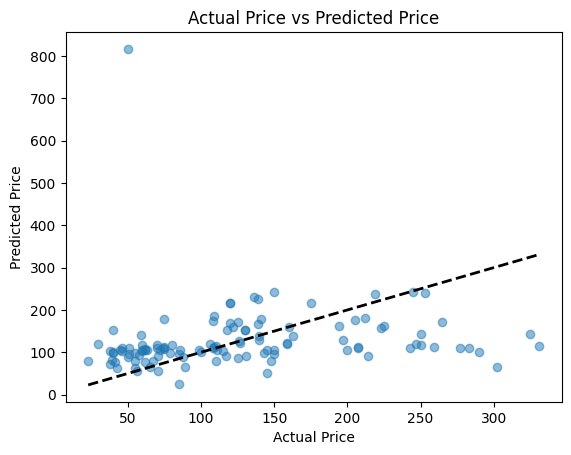

In [46]:
# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

# Add diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Show plot
plt.show()

#Price prediction
In this section, we will predict hotel prices

In [47]:
# Make prediction for new data
new_data = pd.DataFrame({
    'rooms': [1],
    'stars_list': [4.8],
    'number_of_reviews_list': [100],
    'occupancy': [2],
    'beds': [2],
    'bath': [2],
    'compound_score': [0]
})
prediction = model.predict(new_data)
print('Predicted price:', prediction[0])

Predicted price: 87.51229540059114


# Lasso Regression model

In [48]:
from sklearn.linear_model import Lasso

# Build Lasso regression model
model = Lasso(alpha=0.1)  # alpha value can be adjusted to control the degree of regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
# Calculate RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

# Create DataFrame with actual and predicted prices for first ten rows
compare_df = pd.DataFrame({'Actual Price': y_test[:10], 'Predicted Price': y_pred[:10]})
print(compare_df.to_string(index=False))

RMSE: 100.76
R-squared: -0.85
 Actual Price  Predicted Price
        145.0       106.683317
        120.0       214.628192
         80.0       117.844629
         71.0        91.427410
        110.0       113.278726
        259.0       111.094769
         46.0       110.101167
         89.0        65.898368
        120.0       170.495321
        302.0        67.794173


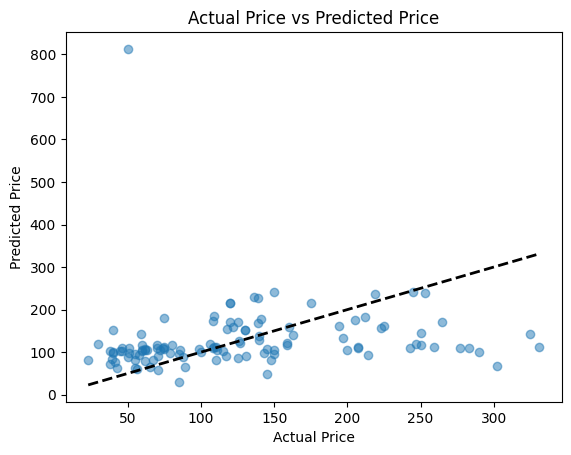

In [50]:
# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

# Add diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Show plot
plt.show()

In [51]:
# Make prediction for new data
new_data = pd.DataFrame({
    'rooms': [1],
    'stars_list': [4.8],
    'number_of_reviews_list': [100],
    'occupancy': [2],
    'beds': [2],
    'bath': [2],
    'compound_score': [0]
})
prediction = model.predict(new_data)
print('Predicted price:', prediction[0])

Predicted price: 88.17117617808015


# Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate model on testing data
y_pred = model.predict(X_test)

In [53]:
# Calculate RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

# Create DataFrame with actual and predicted prices for first ten rows
compare_df = pd.DataFrame({'Actual Price': y_test[:10], 'Predicted Price': y_pred[:10]})
print(compare_df.to_string(index=False))

RMSE: 86.18
R-squared: -0.35
 Actual Price  Predicted Price
        145.0       101.357143
        120.0       209.928571
         80.0       101.357143
         71.0        81.833333
        110.0        81.833333
        259.0        81.833333
         46.0       101.357143
         89.0       101.357143
        120.0       183.300000
        302.0        80.000000


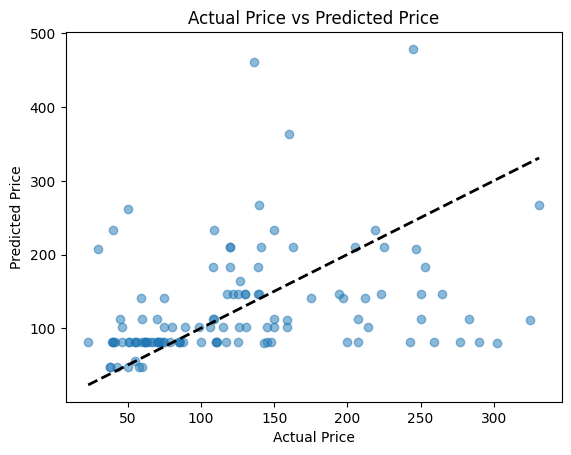

In [54]:
# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

# Add diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Show plot
plt.show()

In [55]:
# Make prediction for new data
new_data = pd.DataFrame({
    'rooms': [1],
    'stars_list': [4.8],
    'number_of_reviews_list': [100],
    'occupancy': [2],
    'beds': [2],
    'bath': [2],
    'compound_score': [0]
})
prediction = model.predict(new_data)
print('Predicted price:', prediction[0])

Predicted price: 81.83333333333333


# Hyperparameter tuning on Decision Tree Regression model

In [56]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'max_depth': [1, 2, 3, 4, 5]}

# Build Decision Tree regression model
model = DecisionTreeRegressor(random_state=42)

# Use Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by Grid Search
print("Best hyperparameters: ", grid_search.best_params_)

# Build Decision Tree regression model with best hyperparameters
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'], random_state=42)
best_model.fit(X_train, y_train)

# Evaluate model on testing data
y_pred = best_model.predict(X_test)

Best hyperparameters:  {'max_depth': 2}


In [58]:
# Calculate RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

# Create DataFrame with actual and predicted prices for first ten rows
compare_df = pd.DataFrame({'Actual Price': y_test[:10], 'Predicted Price': y_pred[:10]})
print(compare_df.to_string(index=False))

RMSE: 75.22
R-squared: -0.03
 Actual Price  Predicted Price
        145.0        88.827119
        120.0       166.432990
         80.0        88.827119
         71.0        88.827119
        110.0        88.827119
        259.0        88.827119
         46.0        88.827119
         89.0        88.827119
        120.0       166.432990
        302.0       150.540541


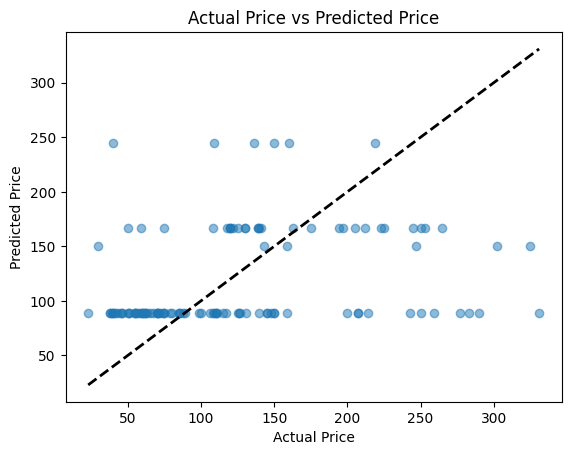

In [59]:
# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

# Add diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Show plot
plt.show()

In [61]:
# Make prediction for new data
new_data = pd.DataFrame({
    'rooms': [1],
    'stars_list': [4.8],
    'number_of_reviews_list': [100],
    'occupancy': [2],
    'beds': [2],
    'bath': [2],
    'compound_score': [0]
})
prediction = best_model.predict(new_data)
print('Predicted price:', prediction[0])

Predicted price: 88.8271186440678
